<a href="https://colab.research.google.com/github/GJ-007-sage/KSP---GRBs/blob/main/MH_MCMC_Sampler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

where the target density function is a Gaussian distribution with:

Mean (loc) = 2

Standard deviation (scale) = sqrt(2), which means the variance is 2

# Gaussian Distribution

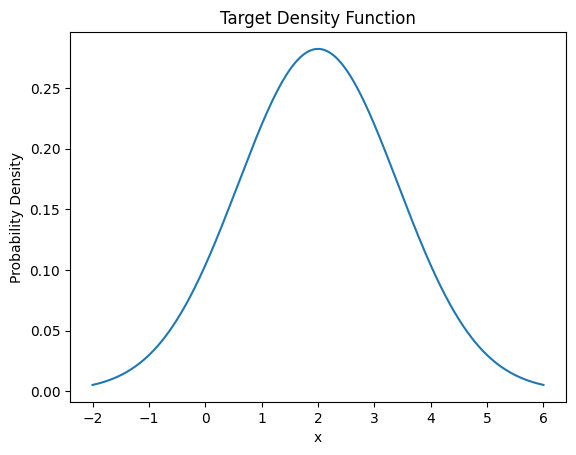

In [ ]:
# Target density: Gaussian with mean 2 and variance 2
def target_density(x):
    return norm.pdf(x, loc=2, scale=np.sqrt(2))

#generates a sequence of 500 evenly spaced values between -2 and 6 using NumPy's linspace function.
x_vals = np.linspace(-2, 6, 500)
true_pdf = target_density(x_vals)

#plot the graph
plt.plot(x_vals, true_pdf)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Target Density Function')
plt.show()


This line of code generates a random sample from a normal (Gaussian) distribution using NumPy's random.normal function.

The sample is drawn from a proposal distribution centered at x (current state).

The standard deviation of the proposal distribution is 1, meaning the variance is 1.

In [ ]:
# Proposal distribution: Gaussian centered at current x, variance 1
def proposal(x):
    return np.random.normal(loc=x, scale=1)

In [ ]:
# Metropolis-Hastings sampler
def metropolis_hastings(num_samples, initial_x):
    samples = [] #samples stores the sequence of values sampled by the algorithm.
    x = initial_x

    #Here, _ is just a placeholder since the loop index isn't needed. The key is that x updates through the Metropolis-Hastings steps.
    for _ in range(num_samples):
        x_new = proposal(x)

        # Compute acceptance ratio
        acceptance_ratio = target_density(x_new) / target_density(x)
        if np.random.rand() < acceptance_ratio:
            x = x_new  # accept
        # else reject (x remains unchanged)
        samples.append(x) #adds the current state x to the list samples at each iteration

    return np.array(samples)

In [ ]:
# Parameters
num_samples = 10000
initial_x = 0

In [ ]:
# Run sampler
samples = metropolis_hastings(num_samples, initial_x)

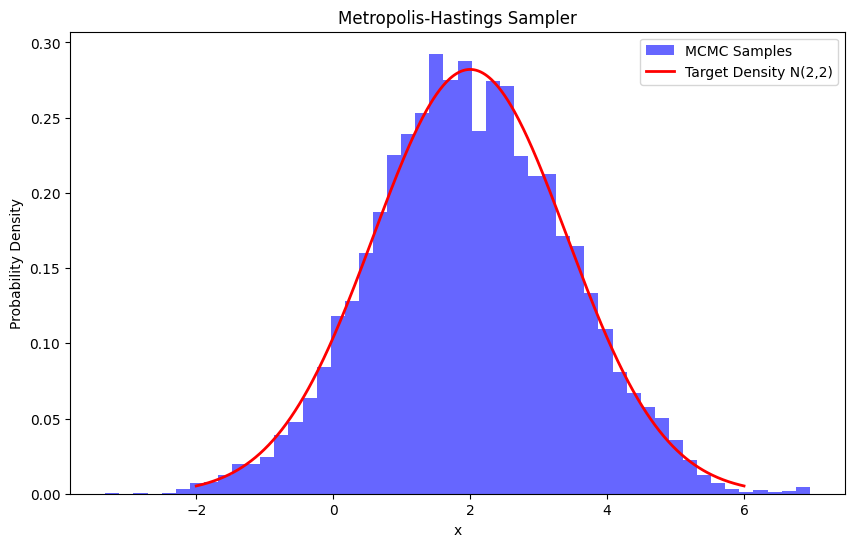

In [ ]:
#plot the final graph
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, density=True, alpha=0.6, color='b', label='MCMC Samples')
plt.plot(x_vals, true_pdf, 'r-', linewidth=2, label='Target Density N(2,2)')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Metropolis-Hastings Sampler')
plt.legend()
plt.show()

# uniform distribution

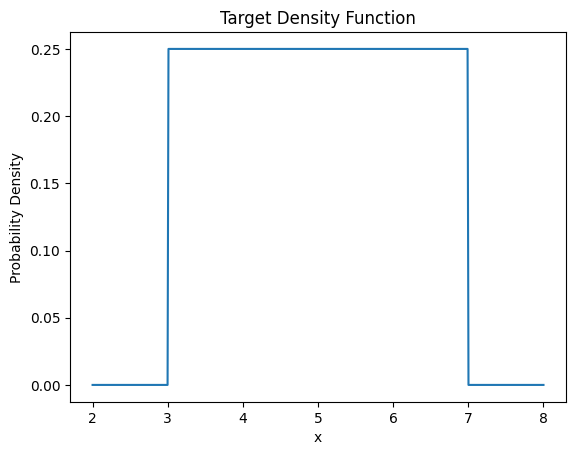

In [ ]:
# Target density: Uniform between 3 and 7
def target_density_uniform(x):
    return np.where((x > 3) & (x < 7), 1 / 4, 0)  # Uniform(3,7) => height = 1 / (7 - 3)

#generates a sequence of 500 evenly spaced values between -2 and 6 using NumPy's linspace function.
x_vals_uniform = np.linspace(2, 8, 500)
true_pdf_uniform = target_density_uniform(x_vals_uniform)

#plot the graph
plt.plot(x_vals_uniform, true_pdf_uniform)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Target Density Function')
plt.show()

In [ ]:
# Proposal distribution: Gaussian centered at current x, variance 1
def proposal_uniform(x):
    return np.random.normal(loc=x, scale=1)

In [ ]:
# Metropolis-Hastings sampler for uniform target
def metropolis_hastings_uniform(num_samples, initial_x):
    samples = []
    x = initial_x

    for _ in range(num_samples):
        x_new = proposal_uniform(x)
        # Acceptance ratio (only non-zero if both x and x_new are in (3,7))
        p_x_new = target_density_uniform(x_new)
        p_x = target_density_uniform(x)
        if p_x == 0:  # Initial x outside support will cause division by zero
            acceptance_ratio = 1  # Accept first step if x is out of support
        else:
            acceptance_ratio = p_x_new / p_x

        if np.random.rand() < acceptance_ratio:
            x = x_new  # accept
        # else reject (x remains unchanged)
        samples.append(x)

    return np.array(samples)

In [ ]:
# Important change: Initialize x *inside* the support (3, 7)
initial_x_uniform = 5 # within the uniform support range
num_samples = 15000

In [ ]:
# Run sampler
samples_uniform = metropolis_hastings_uniform(num_samples, initial_x_uniform)

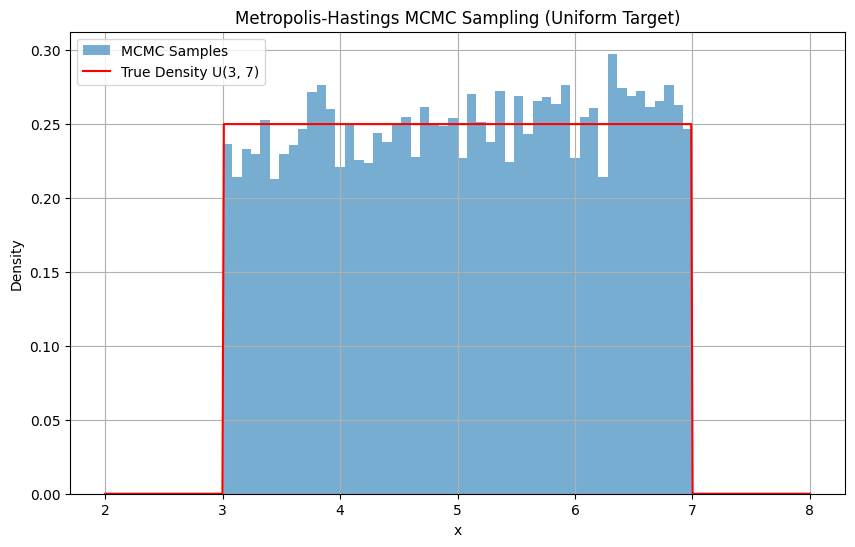

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(samples_uniform, bins=50, density=True, alpha=0.6, label='MCMC Samples')
plt.plot(x_vals_uniform, true_pdf_uniform, 'r-', label='True Density U(3, 7)')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Metropolis-Hastings MCMC Sampling (Uniform Target)')
plt.legend()
plt.grid(True)
plt.show()

We initialized at
𝑥
=
5
 — inside the support
(
3
,
7
)
 — because:

If we started outside the support, say at
𝑥
=
0, the target density
𝑝
(
𝑥
)
=
0
, which would make the acceptance ratio undefined (or always zero), and the sampler would never move into the valid region.

# 2 dimensional gaussian function

In [ ]:
from scipy.stats import multivariate_normal

cov_target defines the covariance matrix for the multivariate normal distribution, meaning it describes the relationship between two dimensions. Specifically:

A covariance matrix captures how the variables influence each other.

Diagonal values represent individual variances.

Off-diagonal values indicate how strongly two variables are correlated.

in our case-

The variance of each variable is 2.0.

The covariance (1.2) suggests a moderate positive correlation between the two dimensions.

In [ ]:
# Target: 2D Gaussian with mean (0, 0) and given covariance matrix
mean_target = np.array([0, 0])
cov_target = np.array([[2.0, 1.2], [1.2, 2.0]])
target_2d = multivariate_normal(mean=mean_target, cov=cov_target)

In [ ]:
# Proposal: 2D Gaussian with identity covariance, centered at current state
def proposal_2d(current):
    return np.random.multivariate_normal(mean=current, cov=np.eye(2))

In [ ]:
# Metropolis-Hastings for 2D
def metropolis_hastings_2d(num_samples, initial):
    samples = []
    x = np.array(initial)

    for _ in range(num_samples):
        x_new = proposal_2d(x)
        p_new = target_2d.pdf(x_new)
        p_old = target_2d.pdf(x)
        acceptance_ratio = p_new / p_old

        if np.random.rand() < acceptance_ratio:
            x = x_new  # accept

        samples.append(x)

    return np.array(samples)

In [ ]:
# Parameters
num_samples_2d = 10000
initial_2d = [0, 0]

In [ ]:
# Run sampler
samples_2d = metropolis_hastings_2d(num_samples_2d, initial_2d)
x_samples = samples_2d[:, 0]
y_samples = samples_2d[:, 1]

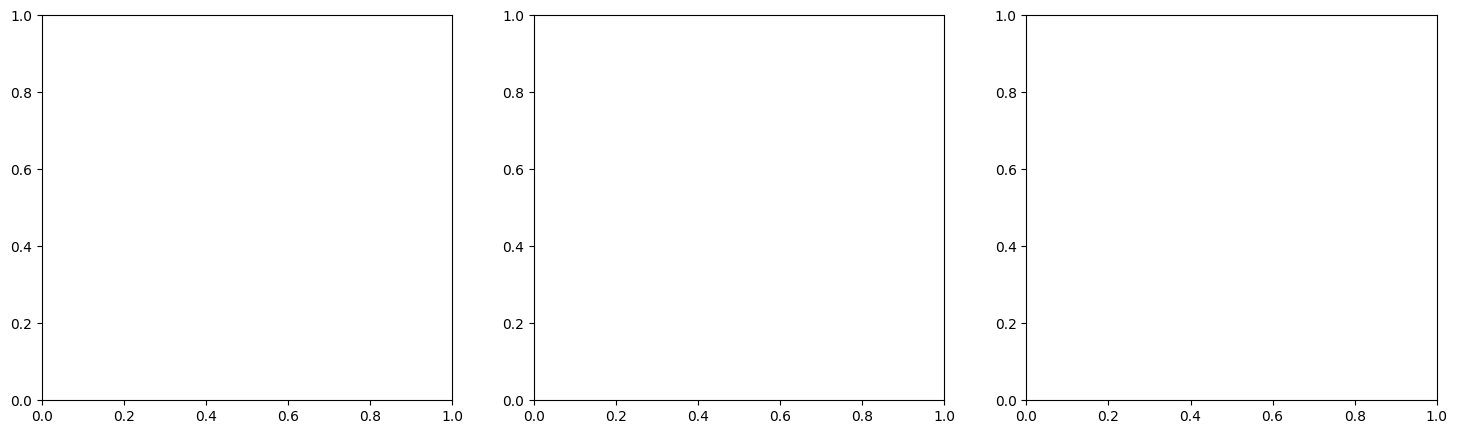

In [ ]:
# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

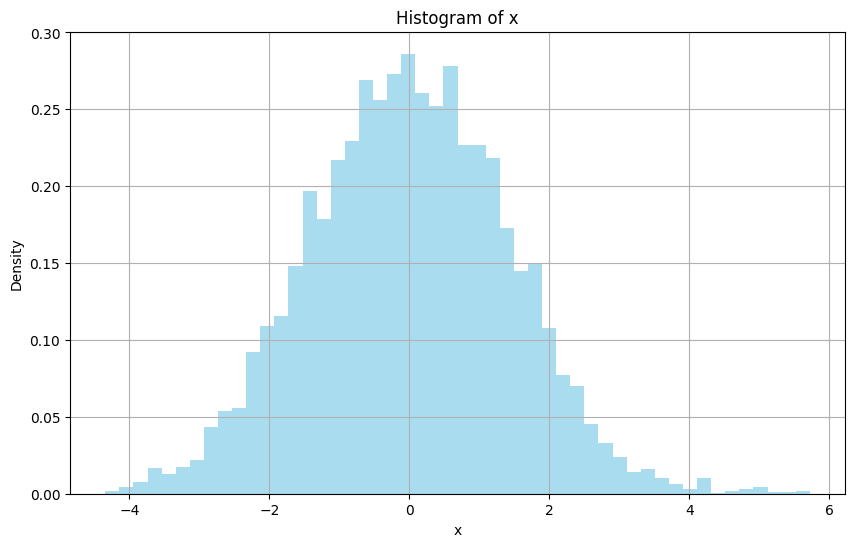

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(x_samples, bins=50, density=True, alpha=0.7, color='skyblue')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram of x')
plt.grid(True)
plt.show()

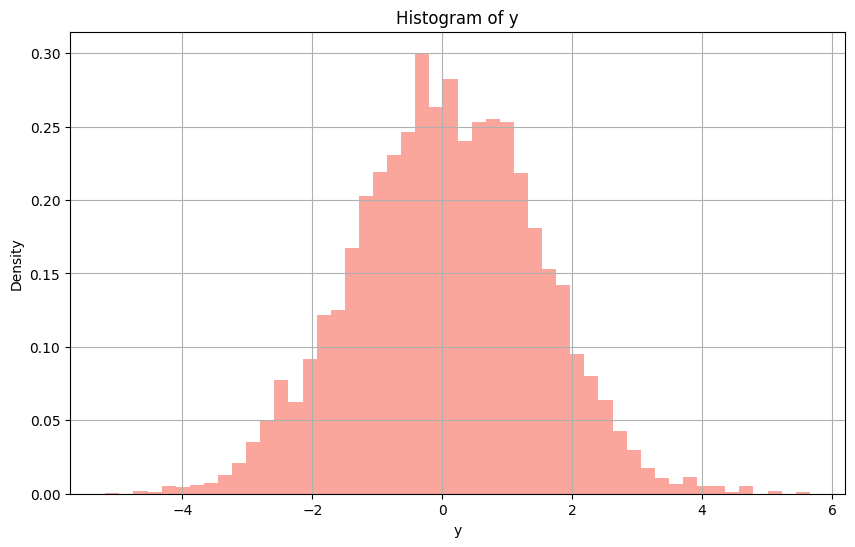

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(y_samples, bins=50, density=True, alpha=0.7, color='salmon')
plt.xlabel('y')
plt.ylabel('Density')
plt.title('Histogram of y')
plt.grid(True)
plt.show()

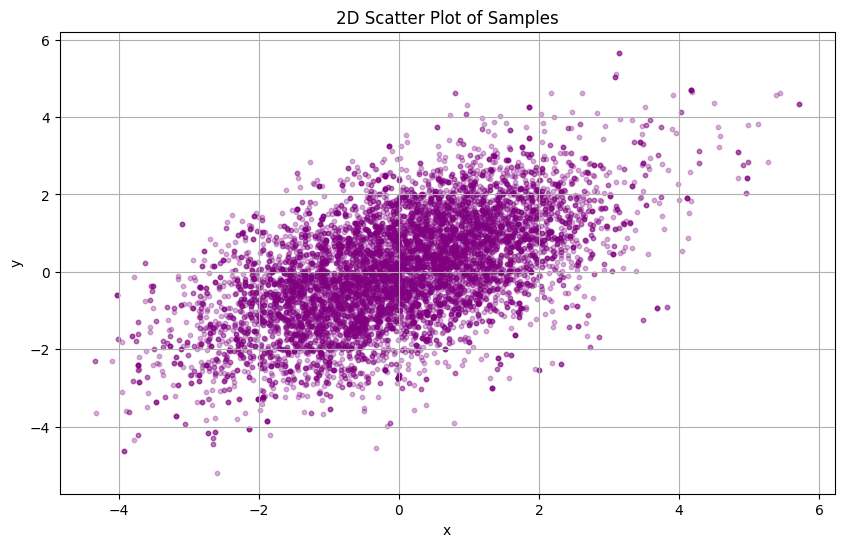

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x_samples, y_samples, alpha=0.3, s=10, color='purple')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Scatter Plot of Samples')
plt.grid(True)
plt.show()

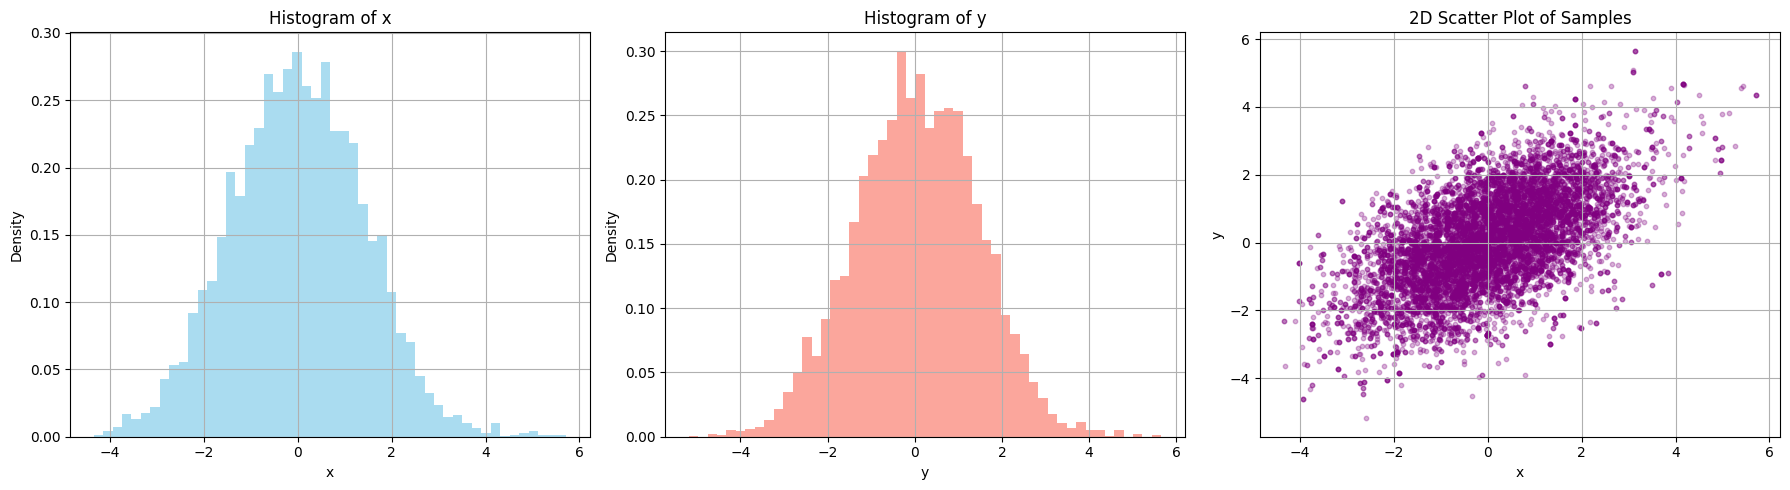

In [ ]:
# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Histogram of x
axs[0].hist(x_samples, bins=50, density=True, alpha=0.7, color='skyblue')
axs[0].set_title("Histogram of x")
axs[0].set_xlabel("x")
axs[0].set_ylabel("Density")
axs[0].grid(True)

# Histogram of y
axs[1].hist(y_samples, bins=50, density=True, alpha=0.7, color='salmon')
axs[1].set_title("Histogram of y")
axs[1].set_xlabel("y")
axs[1].set_ylabel("Density")
axs[1].grid(True)

# Scatter plot
axs[2].scatter(x_samples, y_samples, alpha=0.3, s=10, color='purple')
axs[2].set_title("2D Scatter Plot of Samples")
axs[2].set_xlabel("x")
axs[2].set_ylabel("y")
axs[2].grid(True)

plt.tight_layout()
plt.show()

This result shows a good spread along both axes, and the elliptical cloud in the scatter plot reflects the correlation introduced by the covariance.

# top hat.

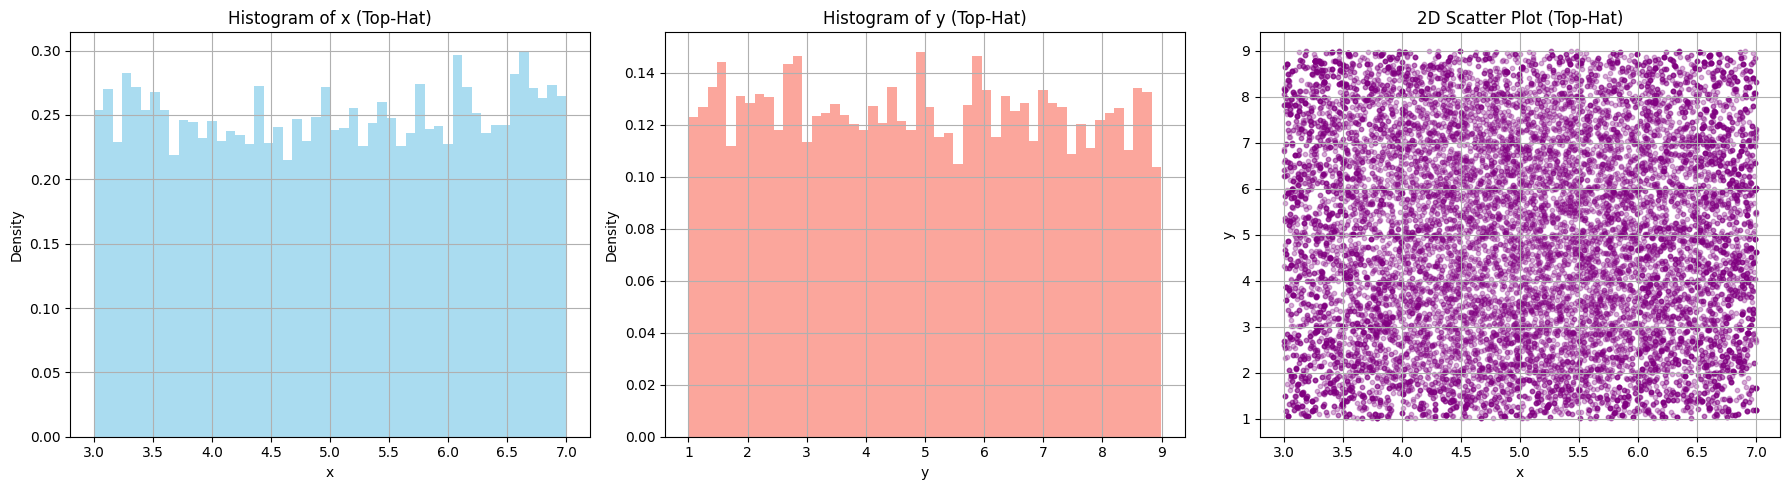

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the top-hat target density: Uniform on 3 < x < 7 and 1 < y < 9
def target_density_tophat(xy):
    x, y = xy
    if 3 < x < 7 and 1 < y < 9:
        return 1 / ((7 - 3) * (9 - 1))  # height of uniform over area = 1 / area
    return 0

# Proposal distribution: 2D Gaussian with identity covariance
def proposal_2d(xy):
    return np.random.multivariate_normal(mean=xy, cov=np.eye(2))

# Metropolis-Hastings sampler
def metropolis_hastings_tophat(num_samples, initial):
    samples = []
    current = np.array(initial)

    for _ in range(num_samples):
        proposal = proposal_2d(current)
        p_current = target_density_tophat(current)
        p_proposal = target_density_tophat(proposal)

        # Acceptance ratio
        if p_current == 0:
            acceptance_ratio = 1  # if current is invalid, accept move
        else:
            acceptance_ratio = p_proposal / p_current

        if np.random.rand() < acceptance_ratio:
            current = proposal  # accept

        samples.append(current)

    return np.array(samples)

# Parameters
num_samples = 15000
initial_xy = [5, 5]  # Must be inside the valid region

# Run sampler
samples = metropolis_hastings_tophat(num_samples, initial_xy)
x_samples = samples[:, 0]
y_samples = samples[:, 1]

# Plot histograms and scatter
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Histogram for x
axs[0].hist(x_samples, bins=50, density=True, alpha=0.7, color='skyblue')
axs[0].set_title("Histogram of x (Top-Hat)")
axs[0].set_xlabel("x")
axs[0].set_ylabel("Density")
axs[0].grid(True)

# Histogram for y
axs[1].hist(y_samples, bins=50, density=True, alpha=0.7, color='salmon')
axs[1].set_title("Histogram of y (Top-Hat)")
axs[1].set_xlabel("y")
axs[1].set_ylabel("Density")
axs[1].grid(True)

# 2D Scatter
axs[2].scatter(x_samples, y_samples, alpha=0.3, s=10, color='purple')
axs[2].set_title("2D Scatter Plot (Top-Hat)")
axs[2].set_xlabel("x")
axs[2].set_ylabel("y")
axs[2].grid(True)

plt.tight_layout()
plt.show()


# toggling the proposal variances

If proposal variance is too Small (0.1) -	Proposals are close to current state → very slow movement, high acceptance, but poor exploration.

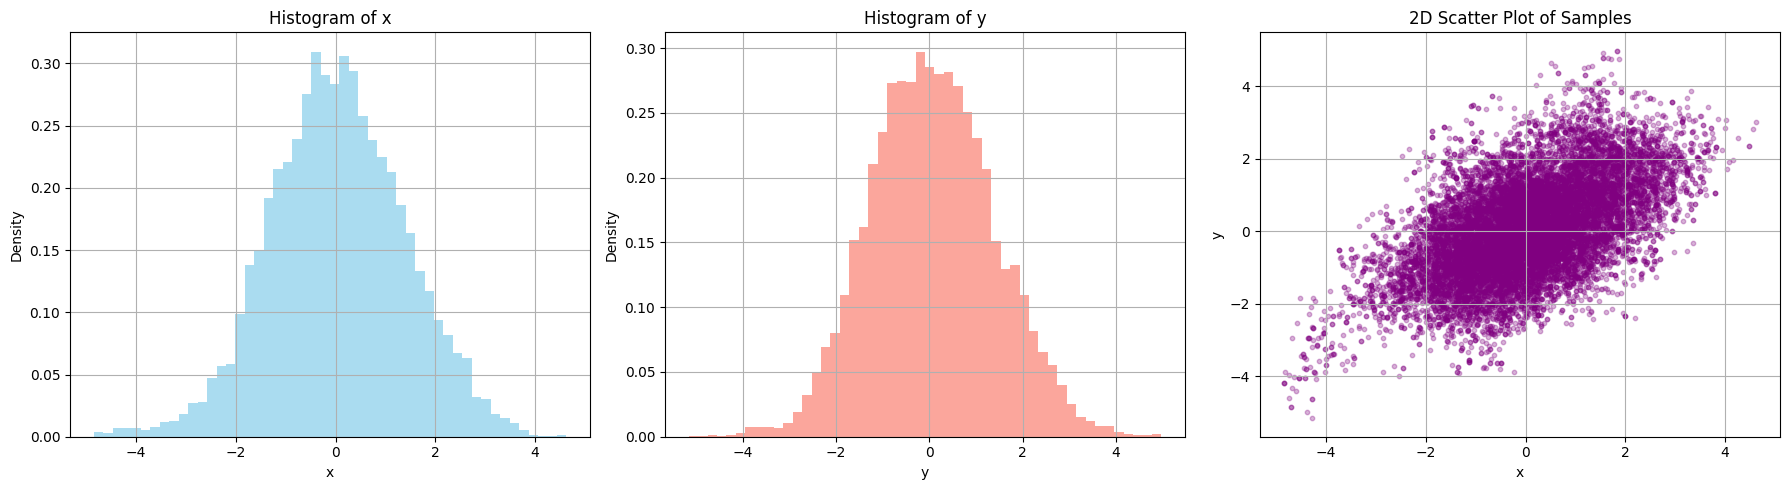

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Target: 2D Gaussian with mean (0, 0) and given covariance matrix
mean_target = np.array([0, 0])
cov_target = np.array([[2.0, 1.2], [1.2, 2.0]])
target_2d = multivariate_normal(mean=mean_target, cov=cov_target)

proposal_var = 1e-1
# Proposal: 2D Gaussian with identity covariance, centered at current state
def proposal_2d(current):
    #return np.random.multivariate_normal(mean=current, cov=np.eye(2))
    return np.random.multivariate_normal(mean=current, cov=proposal_var * np.eye(2))


# Metropolis-Hastings for 2D
def metropolis_hastings_2d(num_samples, initial):
    samples = []
    x = np.array(initial)

    for _ in range(num_samples):
        x_new = proposal_2d(x)
        p_new = target_2d.pdf(x_new)
        p_old = target_2d.pdf(x)
        acceptance_ratio = p_new / p_old

        if np.random.rand() < acceptance_ratio:
            x = x_new  # accept

        samples.append(x)

    return np.array(samples)

# Parameters
num_samples_2d = 15000
initial_2d = [0, 0]

# Run sampler
samples_2d = metropolis_hastings_2d(num_samples_2d, initial_2d)
x_samples = samples_2d[:, 0]
y_samples = samples_2d[:, 1]

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Histogram of x
axs[0].hist(x_samples, bins=50, density=True, alpha=0.7, color='skyblue')
axs[0].set_title("Histogram of x")
axs[0].set_xlabel("x")
axs[0].set_ylabel("Density")
axs[0].grid(True)

# Histogram of y
axs[1].hist(y_samples, bins=50, density=True, alpha=0.7, color='salmon')
axs[1].set_title("Histogram of y")
axs[1].set_xlabel("y")
axs[1].set_ylabel("Density")
axs[1].grid(True)

# Scatter plot
axs[2].scatter(x_samples, y_samples, alpha=0.3, s=10, color='purple')
axs[2].set_title("2D Scatter Plot of Samples")
axs[2].set_xlabel("x")
axs[2].set_ylabel("y")
axs[2].grid(True)

plt.tight_layout()
plt.show()


Too Large variance of proposal (100) -	Proposals jump far → often land in low-probability regions → low acceptance rate, poor sampling efficiency.

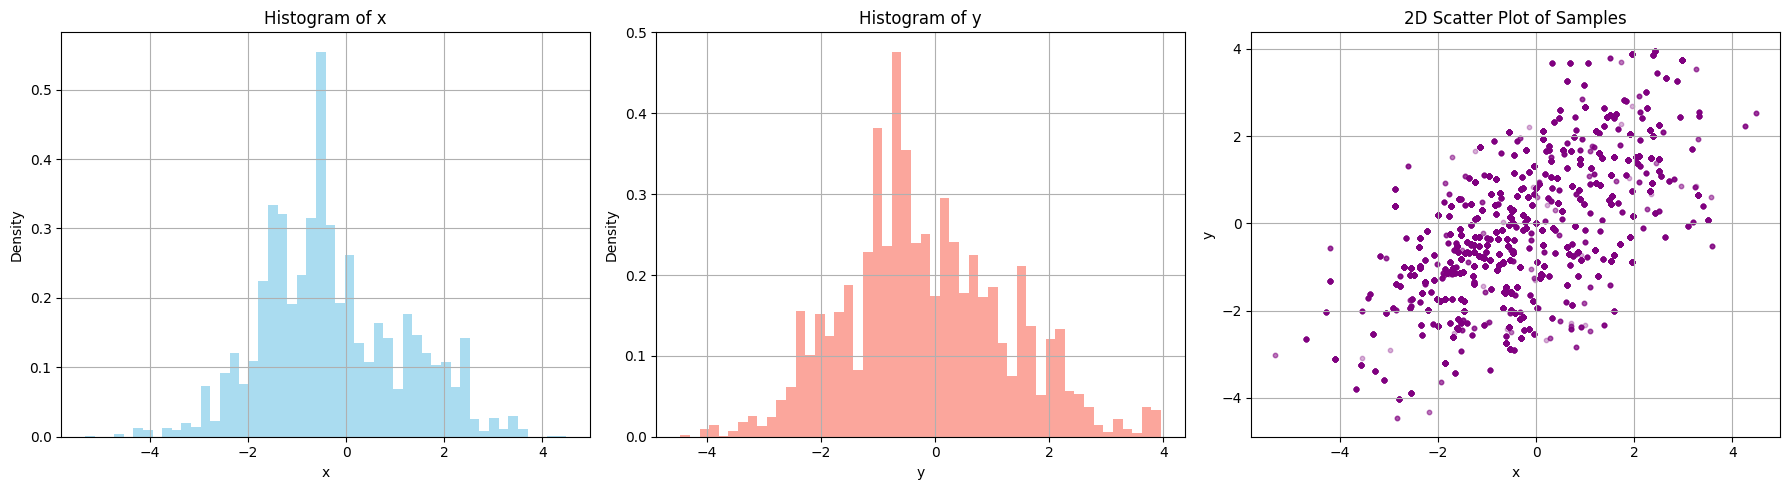

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Target: 2D Gaussian with mean (0, 0) and given covariance matrix
mean_target = np.array([0, 0])
cov_target = np.array([[2.0, 1.2], [1.2, 2.0]])
target_2d = multivariate_normal(mean=mean_target, cov=cov_target)

proposal_var = 100
# Proposal: 2D Gaussian with identity covariance, centered at current state
def proposal_2d(current):
    #return np.random.multivariate_normal(mean=current, cov=np.eye(2))
    return np.random.multivariate_normal(mean=current, cov=proposal_var * np.eye(2))


# Metropolis-Hastings for 2D
def metropolis_hastings_2d(num_samples, initial):
    samples = []
    x = np.array(initial)

    for _ in range(num_samples):
        x_new = proposal_2d(x)
        p_new = target_2d.pdf(x_new)
        p_old = target_2d.pdf(x)
        acceptance_ratio = p_new / p_old

        if np.random.rand() < acceptance_ratio:
            x = x_new  # accept

        samples.append(x)

    return np.array(samples)

# Parameters
num_samples_2d = 15000
initial_2d = [0, 0]

# Run sampler
samples_2d = metropolis_hastings_2d(num_samples_2d, initial_2d)
x_samples = samples_2d[:, 0]
y_samples = samples_2d[:, 1]

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Histogram of x
axs[0].hist(x_samples, bins=50, density=True, alpha=0.7, color='skyblue')
axs[0].set_title("Histogram of x")
axs[0].set_xlabel("x")
axs[0].set_ylabel("Density")
axs[0].grid(True)

# Histogram of y
axs[1].hist(y_samples, bins=50, density=True, alpha=0.7, color='salmon')
axs[1].set_title("Histogram of y")
axs[1].set_xlabel("y")
axs[1].set_ylabel("Density")
axs[1].grid(True)

# Scatter plot
axs[2].scatter(x_samples, y_samples, alpha=0.3, s=10, color='purple')
axs[2].set_title("2D Scatter Plot of Samples")
axs[2].set_xlabel("x")
axs[2].set_ylabel("y")
axs[2].grid(True)

plt.tight_layout()
plt.show()


Why, in all of the previous problems, did we give
the proposal distributions  q(x'∣x)  a mean of x? What would be
bad if we hadn’t done that?

In [ ]:
#In Metropolis–Hastings, the proposal distribution q(x′∣x) suggests a new sample x` based on the current sample 𝑥 Setting the mean of the proposal distribution to the current point (i.e.,μ=x) means:
#We're making local proposals, moving step-by-step through the space.
#The sampler can explore the target distribution efficiently.

What if we didn’t use mean = x?

Suppose you used a proposal with a fixed mean (e.g., always proposing from
N(0,I) regardless of where you are):

Bad things happen:

- No dependence on current state - The sampler can't "walk" through the space. It just samples random points each time — like rejection sampling, not MCMC.

- Extremely low acceptance rate -	If the proposed point is far from a high-density region, it’ll be rejected often.

- Poor convergence -	The chain won’t "follow the contours" of the target distribution. You lose the advantage of Markovian locality.

- No detailed balance - M–H relies on detailed balance, which assumes q(x′∣x) reflects the local structure of the space. Violating that can break convergence to the correct distribution.


Think of exploring a mountain range:

-- With mean = x, you're taking local steps like a careful hiker: you explore the terrain.

-- With mean ≠ x, you're teleporting blindly — you might miss peaks and valleys entirely.

We set the mean of the proposal distribution to the current point 𝑥 so that the chain:

- - Proposes nearby moves

- - Maintains detailed balance

- - Ensures efficient exploration and convergence to the target distribution

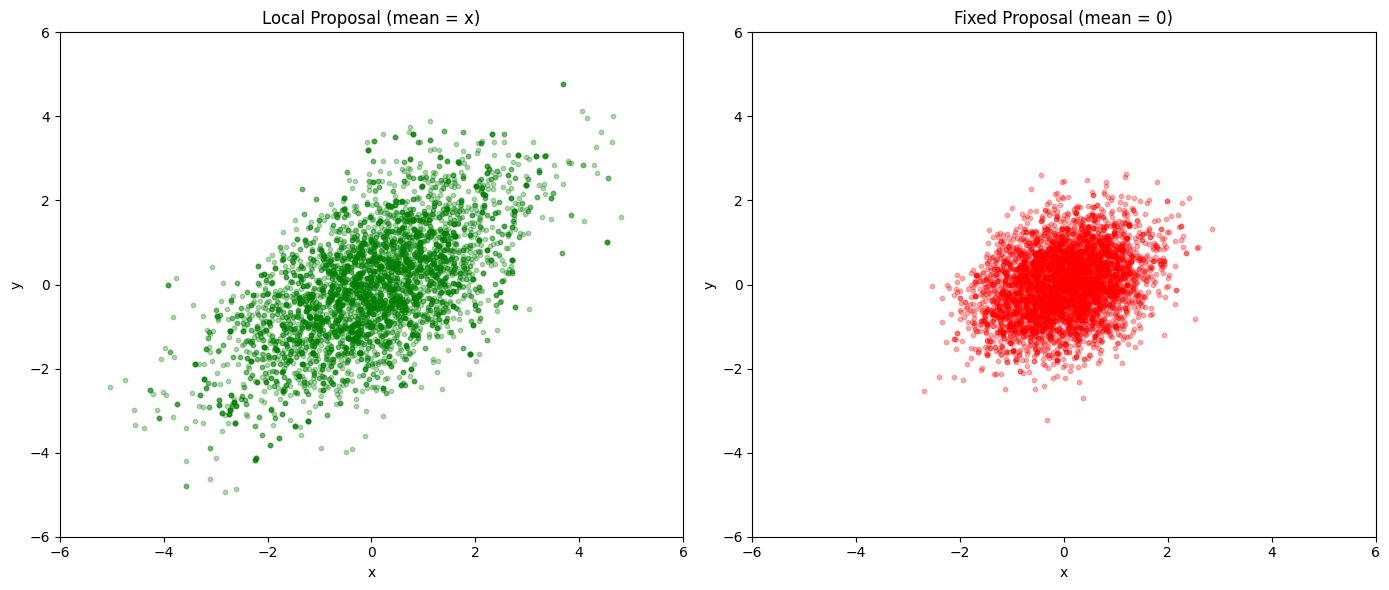

In [ ]:
# Re-import required libraries after code execution state reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Target distribution: 2D Gaussian
mean_target = np.array([0, 0])
cov_target = np.array([[2.0, 1.2], [1.2, 2.0]])
target = multivariate_normal(mean=mean_target, cov=cov_target)

# Proposal samplers
def proposal_local(current, var=1.0):
    return np.random.multivariate_normal(current, var * np.eye(2))

def proposal_fixed(var=1.0):
    return np.random.multivariate_normal([0, 0], var * np.eye(2))

# Metropolis-Hastings sampler
def run_mh_sampler(num_samples, use_local=True, var=1.0):
    samples = []
    current = np.array([0.0, 0.0])

    for _ in range(num_samples):
        proposal = proposal_local(current, var) if use_local else proposal_fixed(var)
        p_current = target.pdf(current)
        p_proposal = target.pdf(proposal)
        acceptance_ratio = min(1, p_proposal / p_current)
        if np.random.rand() < acceptance_ratio:
            current = proposal
        samples.append(current)

    return np.array(samples)

# Run both samplers
samples_local = run_mh_sampler(5000, use_local=True, var=1.0)
samples_fixed = run_mh_sampler(5000, use_local=False, var=1.0)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].scatter(samples_local[:, 0], samples_local[:, 1], alpha=0.3, s=10, color='green')
axs[0].set_title("Local Proposal (mean = x)")
axs[0].set_xlim(-6, 6)
axs[0].set_ylim(-6, 6)
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")

axs[1].scatter(samples_fixed[:, 0], samples_fixed[:, 1], alpha=0.3, s=10, color='red')
axs[1].set_title("Fixed Proposal (mean = 0)")
axs[1].set_xlim(-6, 6)
axs[1].set_ylim(-6, 6)
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")

plt.tight_layout()
plt.show()


with a proposal q(x`|x) with a stupidly shifted mean of x + 2

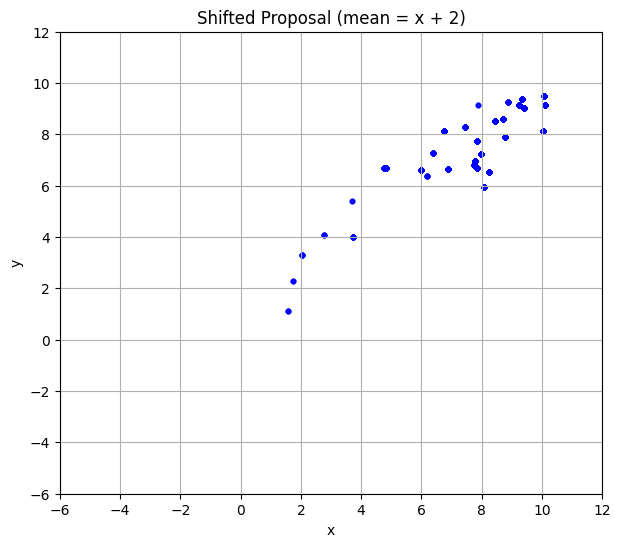

In [ ]:
# Proposal sampler with a "stupidly shifted" mean: mean = x + 2
def proposal_shifted(current, var=1.0):
    shifted_mean = current + np.array([2.0, 2.0])
    return np.random.multivariate_normal(shifted_mean, var * np.eye(2))

# Modified MH sampler for shifted proposal
def run_mh_sampler_shifted(num_samples, var=1.0):
    samples = []
    current = np.array([0.0, 0.0])

    for _ in range(num_samples):
        proposal = proposal_shifted(current, var)
        p_current = target.pdf(current)
        p_proposal = target.pdf(proposal)
        acceptance_ratio = min(1, p_proposal / p_current)
        if np.random.rand() < acceptance_ratio:
            current = proposal
        samples.append(current)

    return np.array(samples)

# Run the sampler with shifted proposal
samples_shifted = run_mh_sampler_shifted(5000, var=1.0)

# Plotting result
plt.figure(figsize=(7, 6))
plt.scatter(samples_shifted[:, 0], samples_shifted[:, 1], alpha=0.3, s=10, color='blue')
plt.title("Shifted Proposal (mean = x + 2)")
plt.xlim(-6, 12)
plt.ylim(-6, 12)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()
